In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data=pd.read_csv("housing.csv")

In [125]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [127]:
data.dropna(inplace=True)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [129]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [130]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [131]:
data["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [132]:
from sklearn.model_selection import train_test_split
X=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]


In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [134]:
train_data=X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2830,-119.01,35.40,11.0,8739.0,2190.0,4781.0,1919.0,1.7109,INLAND,44600.0
14951,-116.96,32.71,18.0,2413.0,533.0,1129.0,551.0,2.4567,<1H OCEAN,155000.0
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,ISLAND,450000.0
14271,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531,NEAR OCEAN,65700.0
305,-122.18,37.76,43.0,2018.0,408.0,1111.0,367.0,1.8913,NEAR BAY,91200.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

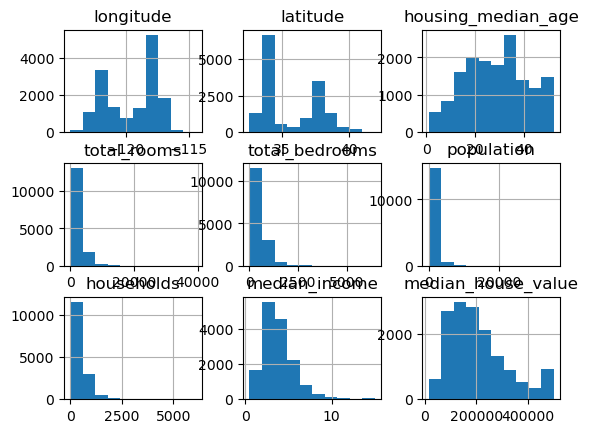

In [135]:
train_data.hist()

In [136]:
train_data["total_rooms"]=np.log(train_data["total_rooms"])
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"])
train_data["population"]=np.log(train_data["population"])
train_data["households"]=np.log(train_data["households"])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

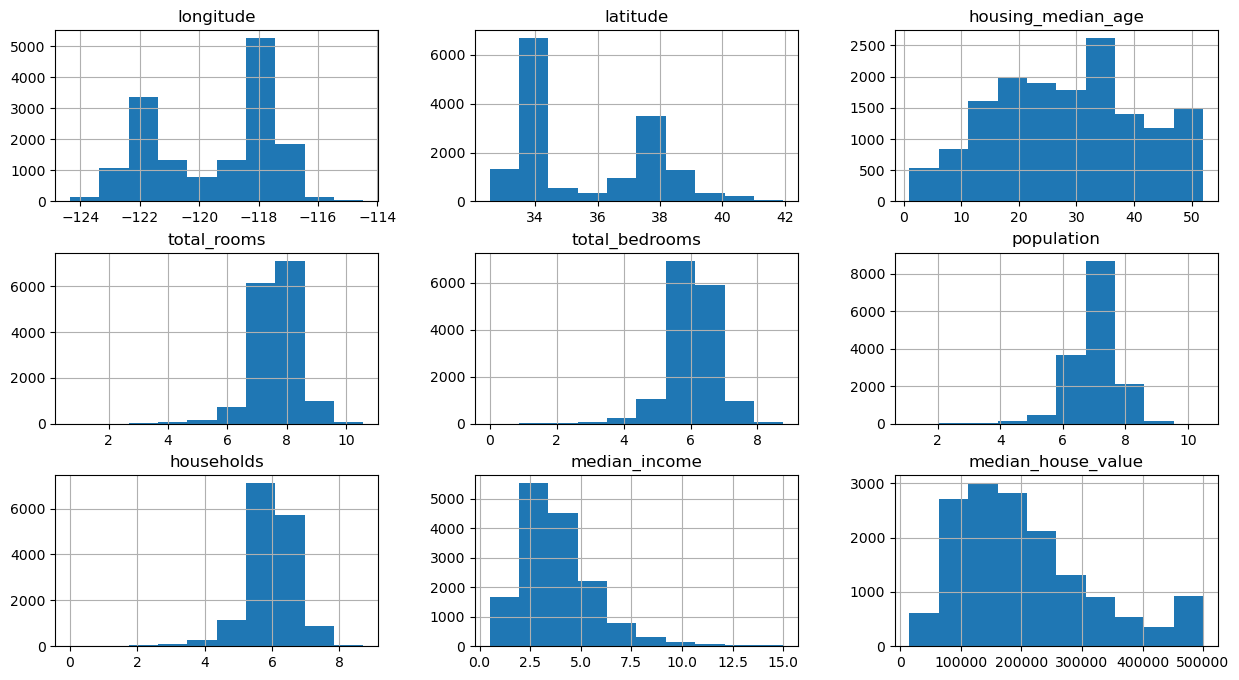

In [137]:
train_data.hist(figsize=(15,8))


In [138]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2830,-119.01,35.40,11.0,9.075551,7.691657,8.472405,7.559559,1.7109,INLAND,44600.0
14951,-116.96,32.71,18.0,7.788626,6.278521,7.029088,6.311735,2.4567,<1H OCEAN,155000.0
8314,-118.32,33.35,27.0,7.423568,6.255750,6.612041,5.802118,2.1579,ISLAND,450000.0
14271,-117.12,32.70,38.0,6.706862,5.379897,6.859615,5.442418,1.0531,NEAR OCEAN,65700.0
305,-122.18,37.76,43.0,7.609862,6.011267,7.013016,5.905362,1.8913,NEAR BAY,91200.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003363,6.214608,7.270313,6.115892,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,8.673513,6.942157,8.088869,6.908755,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,7.374002,5.910797,6.858565,5.891644,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,8.651549,6.969791,8.142063,6.963190,5.2879,NEAR BAY,231200.0


In [139]:
train_data = train_data.drop("ocean_proximity", axis=1).join(
    pd.get_dummies(train_data["ocean_proximity"]).astype(int)
)


In [140]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2830,-119.01,35.40,11.0,9.075551,7.691657,8.472405,7.559559,1.7109,44600.0,0,1,0,0,0
14951,-116.96,32.71,18.0,7.788626,6.278521,7.029088,6.311735,2.4567,155000.0,1,0,0,0,0
8314,-118.32,33.35,27.0,7.423568,6.255750,6.612041,5.802118,2.1579,450000.0,0,0,1,0,0
14271,-117.12,32.70,38.0,6.706862,5.379897,6.859615,5.442418,1.0531,65700.0,0,0,0,0,1
305,-122.18,37.76,43.0,7.609862,6.011267,7.013016,5.905362,1.8913,91200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003363,6.214608,7.270313,6.115892,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673513,6.942157,8.088869,6.908755,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374002,5.910797,6.858565,5.891644,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651549,6.969791,8.142063,6.963190,5.2879,231200.0,0,0,0,1,0


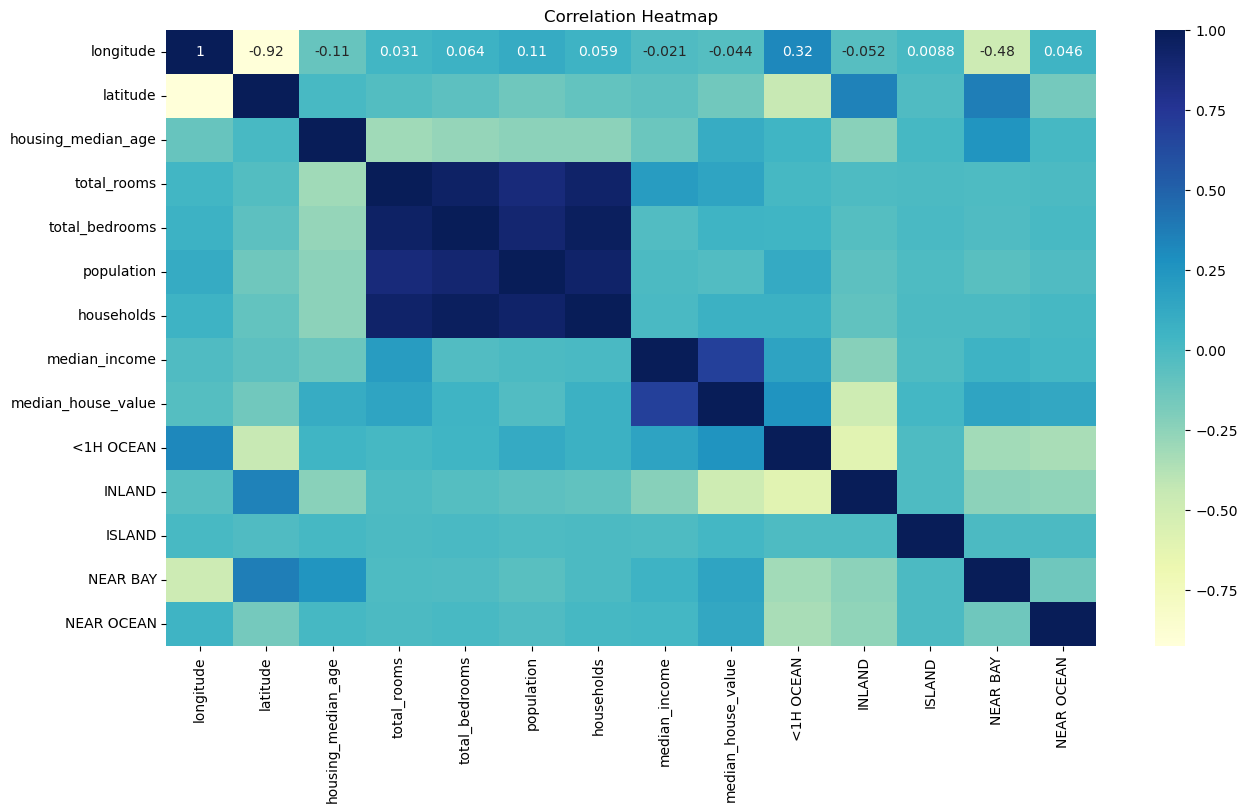

In [141]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

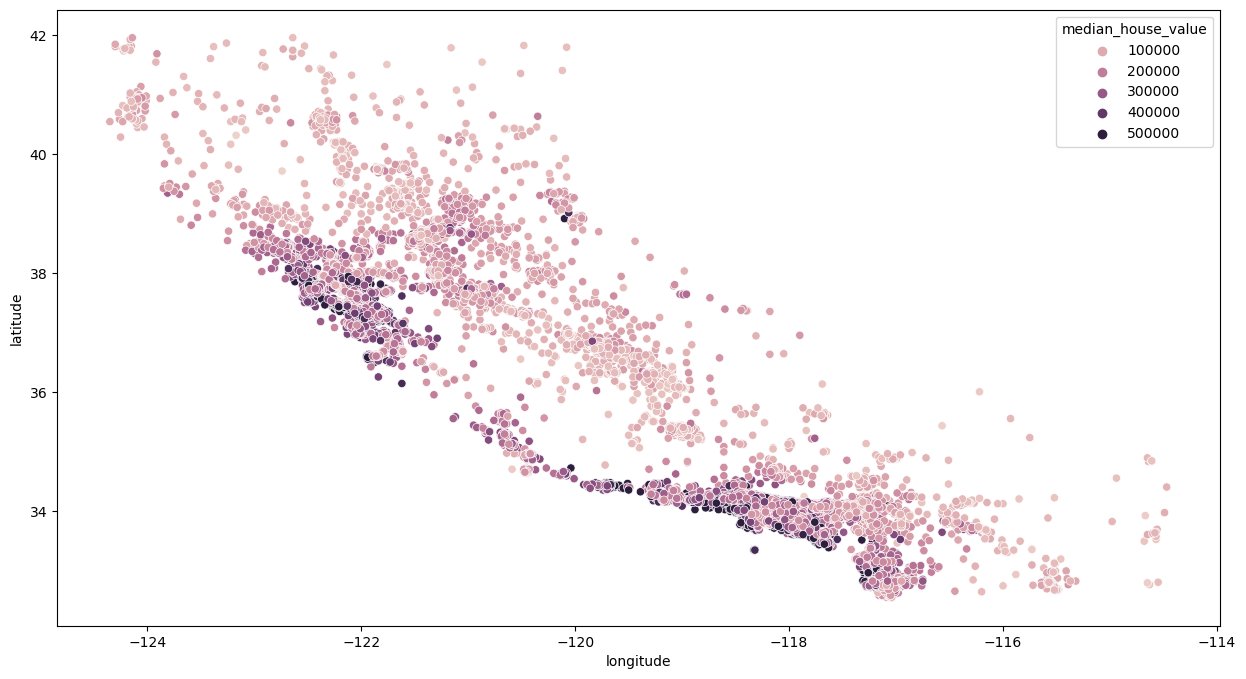

In [142]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude",y="latitude",data=train_data,hue="median_house_value")

Feature Engineering

In [143]:
train_data["bedroom_ratio"]=train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"]=train_data["total_rooms"]/train_data["households"]

<Axes: >

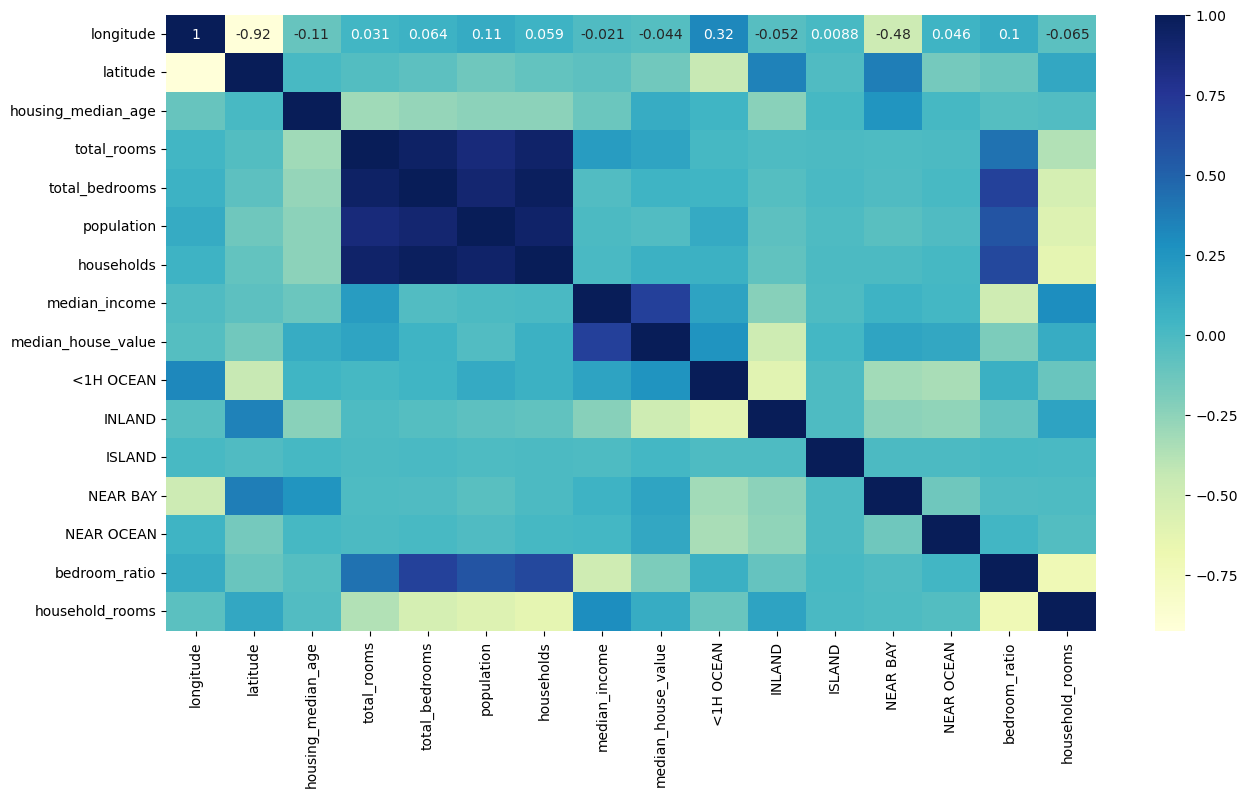

In [144]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [145]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
longitude,1.000000,-0.924465,-0.105997,0.030694,0.063613,0.109501,0.058750,-0.020789,-0.044425,0.321868,-0.051795,0.008771,-0.478381,0.046452,0.102616,-0.064811
latitude,-0.924465,1.000000,0.009742,-0.032925,-0.070699,-0.136235,-0.090236,-0.073321,-0.144499,-0.447851,0.348511,-0.015031,0.363080,-0.160826,-0.117152,0.129198
housing_median_age,-0.105997,0.009742,1.000000,-0.313856,-0.271497,-0.243902,-0.242550,-0.120937,0.105100,0.045235,-0.237238,0.016719,0.255005,0.019308,-0.037574,-0.029107
total_rooms,0.030694,-0.032925,-0.313856,1.000000,0.945583,0.863696,0.932146,0.208767,0.155701,0.021072,-0.011336,-0.004876,-0.014647,-0.001502,0.426102,-0.369891
total_bedrooms,0.063613,-0.070699,-0.271497,0.945583,1.000000,0.896338,0.975208,-0.022888,0.051042,0.043974,-0.044292,0.000432,-0.017613,0.012715,0.683715,-0.529593
population,0.109501,-0.136235,-0.243902,0.863696,0.896338,1.000000,0.930249,-0.002150,-0.025002,0.114956,-0.069857,-0.010281,-0.057949,-0.018541,0.578307,-0.585679
households,0.058750,-0.090236,-0.242550,0.932146,0.975208,0.930249,1.000000,0.006730,0.069703,0.073875,-0.085835,-0.006334,-0.006664,0.015786,0.645476,-0.625273
median_income,-0.020789,-0.073321,-0.120937,0.208767,-0.022888,-0.002150,0.006730,1.000000,0.687135,0.161973,-0.232012,-0.009554,0.060114,0.024396,-0.492729,0.290354
median_house_value,-0.044425,-0.144499,0.105100,0.155701,0.051042,-0.025002,0.069703,0.687135,1.000000,0.258658,-0.481118,0.028111,0.155683,0.133687,-0.191420,0.100345
<1H OCEAN,0.321868,-0.447851,0.045235,0.021072,0.043974,0.114956,0.073875,0.161973,0.258658,1.000000,-0.603634,-0.012515,-0.319671,-0.344406,0.080152,-0.119019


In [146]:
from sklearn.linear_model import LinearRegression
X_train = train_data.drop(["median_house_value"], axis=1)
y_train = train_data["median_house_value"]

X_train = X_train.replace([np.inf, -np.inf], np.nan)

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [147]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [148]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [149]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,False,False,False,False,True,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,False,True,False,False,False,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,True,False,False,False,False,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,False,False,False,True,False,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,False,True,False,False,False,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14148,-117.08,32.73,36.0,7.055313,5.389072,6.429719,5.455321,3.6125,False,False,False,False,True,0.763832,1.293290
14743,-117.06,32.58,11.0,7.965546,6.522093,7.649216,6.513230,3.5125,False,False,False,False,True,0.818788,1.222979
19496,-121.00,37.66,43.0,7.770645,6.025866,6.851185,6.047372,3.2632,False,True,False,False,False,0.775465,1.284962
20553,-121.79,38.68,24.0,8.241440,6.744059,7.707962,6.762730,2.8068,False,True,False,False,False,0.818311,1.218656


In [150]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2830,-119.01,35.40,11.0,9.075551,7.691657,8.472405,7.559559,1.7109,0,1,0,0,0,0.847514,1.200540
14951,-116.96,32.71,18.0,7.788626,6.278521,7.029088,6.311735,2.4567,1,0,0,0,0,0.806114,1.233991
8314,-118.32,33.35,27.0,7.423568,6.255750,6.612041,5.802118,2.1579,0,0,1,0,0,0.842688,1.279458
14271,-117.12,32.70,38.0,6.706862,5.379897,6.859615,5.442418,1.0531,0,0,0,0,1,0.802148,1.232331
305,-122.18,37.76,43.0,7.609862,6.011267,7.013016,5.905362,1.8913,0,0,0,1,0,0.789931,1.288636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003363,6.214608,7.270313,6.115892,5.4286,1,0,0,0,0,0.776500,1.308617
12081,-117.54,33.76,5.0,8.673513,6.942157,8.088869,6.908755,4.7965,1,0,0,0,0,0.800386,1.255438
5447,-118.42,34.01,42.0,7.374002,5.910797,6.858565,5.891644,3.0990,1,0,0,0,0,0.801572,1.251603
866,-122.04,37.57,12.0,8.651549,6.969791,8.142063,6.963190,5.2879,0,0,0,1,0,0.805612,1.242469


In [151]:
reg.score(X_test, y_test)


0.6757006562638328

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [157]:
reg.score(X_test_scaled, y_test)

0.675700656263833

In [158]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)
forest.score(X_test_scaled, y_test)


0.8221613605832511

In [159]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_scaled, y_train)
grid_search.best_estimator_


RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [160]:
grid_search.best_estimator_.score(X_test_s, y_test)


NameError: name 'X_test_s' is not defined